PLASTIC CUP FACTORY: Scenario

A local family-owned plastic cup manufacturer wants to optimize their production mix in order to maximize their profit. 

They produce personalized beer mugs and champagne glasses. 

The profit on a case of beer mugs is $25, while the profit on a case of champagne glasses is $20. 

The cups are manufactured with a machine called a plastic extruder which feeds on plastic resins. 

Each case of beer mugs requires 20 lbs. of plastic resins to produce, while champagne glasses require 12 lbs. per case. 

The daily supply of plastic resins is limited to at most 1800 pounds. About 15 cases of either product can be produced per hour. 

At the moment, the family wants to limit their workday to 8 hours.


PLASTIC CUP FACTORY : Solution

Step 1:  Identifying Decision Variables - These variables represent the quantifiable decisions that must be made to determine the daily production schedule. 

The best way to identify the decision variables is to put oneself in the shoes of the decision maker and then ask the question, “What do I need to know in order to make this thing work?”

Decision Variables: 
		B = Number of cases of beer mugs to be produced daily. 
	              C = Number of cases of champagne glasses to be produced daily.


Step 2: Identify the objective Function.

Maximize profit where profit = 25B + 20C
![image.png](attachment:image.png)

Step 3: Determine Explicit and Implicit Constraints. 

Explicit Constraints:

The explicit constraints are those that are explicitly given in the problem statement. In the problem under consideration, there are explicit constraints on the amount of resin and the number of work hours that are available on a daily basis.

Explicit Constraints:

Resin constraint: 20B + 12C <= 1800 
Work hours constraint: B/15 + C/15 <= 8

Implicit Constraints:

These are constraints that are not explicitly given in the problem statement but are present nonetheless. In the cup factory problem, it is clear that one cannot have negative cases of beer mugs and champagne glasses. That is, both B and C must be non-negative quantities.

Implicit Constraints: 

0 <= B, 0 <= C.

![image-2.png](attachment:image-2.png)

The entire model for the cup factory problem can now be succinctly stated as:
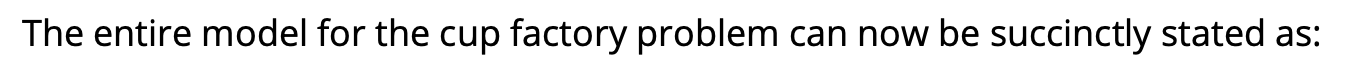

P : max 25B + 20C 
subject to 20B + 12C  <= 1800 
                (1/15)*B + (1/15)*C <=  8 
	0  <= B, C
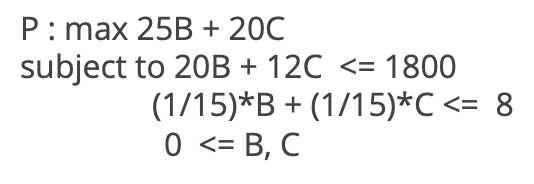

In [1]:
from scipy.optimize import linprog

linprog can only minimize i.e find the minimum value but not maximize. Thus we reverse sign:
max 25B + 20C is  same as min -25B -20C

In [2]:
obj = [-25, -20]

constrains always have to be <=. If otherwise, then reverse sign to make it <=. Here it was already <=.

In [5]:
lhs_ineq = [[20, 12], 
            [1/15, 1/15]]

In [6]:
rhs_ineq = [1800, 8]

In [8]:
bnds = [(0, float('inf')),
        (0, float('inf'))]

In [10]:
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnds, method="revised simplex")

/var/folders/03/dbs2l00d4xz927ww7vh59lm00000gn/T/ipykernel_81697/1832200594.py:1: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnds, method="revised simplex")


In [11]:
opt

     con: array([], dtype=float64)
     fun: -2625.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([45., 75.])

In [12]:
opt.fun

-2625.0

In [13]:
opt.x

array([45., 75.])

### The maximum profit hence is 2625. B = 45 (no. of beermugs cases), C = 75 (no. of champagne glass cases).